**EDA**


**Imports**


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
import seaborn as sns
from datetime import datetime

**Load Data**

In [22]:
boulderfiretweet= "boulder_fire_tweets.csv"
boulderfire = pd.read_csv(boulderfiretweet)
boulderfire.head()

,ImberJane,2022-03-28 22:56:22+00:00,RT @oliviaprentzel: Mandatory evacuation orders were issued for a wildfire just east of Estes Park... two days after the #NCAR fire sparked…,1508578772563501058
0,boulder_fire,2022-03-28 22:55:38+00:00,RT @BoulderOEM: Containment of #NCARFire is cu...,1508578590010621955
1,RachelAnneLevy,2022-03-28 22:47:19+00:00,Climate change is dangerous and costly. \n\nWe...,1508576497744891908
2,Boulderchick,2022-03-28 22:45:07+00:00,No more Fire!! #Boulder this up near Estes ht...,1508575942947467264
3,KhalaCompany,2022-03-28 22:40:19+00:00,"RT @rmpbs: ""The concern is that any time there...",1508574735940128778
4,KhalaCompany,2022-03-28 22:39:29+00:00,RT @CUBoulderENVS: As we return from Spring Br...,1508574525851672588


In [23]:
boulderfire = boulderfire.rename(columns={"ImberJane": "user", "2022-03-28 22:56:22+00:00" : "date","RT @oliviaprentzel: Mandatory evacuation orders were issued for a wildfire just east of Estes Park... two days after the #NCAR fire sparked…": "body","1508578772563501058":"id"})

In [24]:
datetime_object=[]
for i in range(0,len(boulderfire['date'])):
    datetime_object.append(datetime.strptime(boulderfire['date'][i][:-6], '%Y-%m-%d %H:%M:%S'))
boulderfire['date']=datetime_object
print(boulderfire.date)
boulderfire['hod'] = [(r.hour +24*(r.day))for r in boulderfire.date]
cats = boulderfire['hod'].unique()

0      2022-03-28 22:55:38
1      2022-03-28 22:47:19
2      2022-03-28 22:45:07
3      2022-03-28 22:40:19
4      2022-03-28 22:39:29
               ...        
4994   2022-03-26 21:54:37
4995   2022-03-26 21:54:32
4996   2022-03-26 21:54:31
4997   2022-03-26 21:54:28
4998   2022-03-26 21:54:27
Name: date, Length: 4999, dtype: datetime64[ns]


In [25]:
dic=[]
for i in cats:
    dic.append(boulderfire.query('hod == ' +'"'+ str(i) +'"').hod.count())
    

In [26]:
print(boulderfire['hod'])

0       694
1       694
2       694
3       694
4       694
       ... 
4994    645
4995    645
4996    645
4997    645
4998    645
Name: hod, Length: 4999, dtype: int64


<BarContainer object of 50 artists>

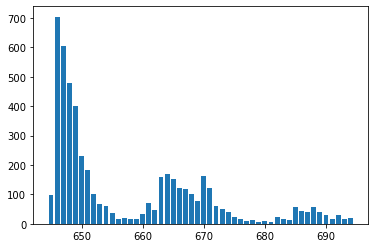

In [27]:
plt.bar(cats,dic)

In [28]:
import spacy

In [29]:
nlp = spacy.load("en_core_web_sm")

In [30]:
bodies=[]
for i in boulderfire['body']:
    bodies.append(nlp(i))

In [31]:
l=nlp("hello, this is a test")

In [32]:
for token in l:
    print(token.text)

hello
,
this
is
a
test


In [33]:
print(l[0].text)

hello


In [34]:
ret=[]
for token in l:
    ret.append(token.text)

In [35]:
print(ret)

['hello', ',', 'this', 'is', 'a', 'test']


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
tf_id_list=[]
count = CountVectorizer()
word_count=count.fit_transform(boulderfire['body'])
vectorizer = TfidfVectorizer(min_df=0, max_features=3000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w{3,}', ngram_range=(1,1),
                            use_idf=True,smooth_idf=True, sublinear_tf=True, stop_words = "english")
x = vectorizer.fit_transform(boulderfire['body'])
print(x)

  (0, 1297)	0.3914921842933826
  (0, 332)	0.2991774971822654
  (0, 1710)	0.29492576140495125
  (0, 96)	0.2024553520062776
  (0, 25)	0.33033168947619523
  (0, 601)	0.3443225349700073
  (0, 2118)	0.35527353110924464
  (0, 147)	0.29174371355287876
  (0, 659)	0.26764587509348575
  (0, 1436)	0.14057385771168554
  (0, 596)	0.22757325968062803
  (0, 302)	0.21693708444542437
  (1, 1114)	0.15048462212673316
  (1, 1690)	0.4515560297773389
  (1, 614)	0.6366016382050477
  (1, 683)	0.2691183183706577
  (1, 460)	0.4741845287172644
  (1, 496)	0.2662972927993941
  (2, 858)	0.911636276572289
  (2, 1437)	0.30837289433785203
  (2, 292)	0.1510111676173982
  (2, 1114)	0.22587847292280672
  (3, 621)	0.24605932918953027
  (3, 2593)	0.25414751710424066
  (3, 1255)	0.3084326873632684
  :	:
  (4996, 1114)	0.14985069431247738
  (4997, 755)	0.3811824970181194
  (4997, 1467)	0.3353321043097359
  (4997, 1195)	0.3664739311633416
  (4997, 1312)	0.3353321043097359
  (4997, 434)	0.35756322940456364
  (4997, 1819)	0.330

In [70]:
import math

from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parkermorris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/parkermorris/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [141]:
def freq_table(full):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

In [147]:
def tfMatrix(freqTable):
    matrix={}
    print(type(freqTable))
    for sent,f_table in freqTable.items():
        tf_table={}
        count_words_in_sentence = len(f_table)
        for word,count in f_table.items():
            tf_table[word] = count / count_words_in_sentence
        matrix[sent] = tf_table
    return matrix

In [75]:
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

In [76]:
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

In [77]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [78]:
def _score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue

In [79]:
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))

    return average



In [80]:

def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [181]:
def run_summarization(text):
    """
    :param text: Plain summary_text of long article
    :return: summarized summary_text
    """

    '''
    We already have a sentence tokenizer, so we just need 
    to run the sent_tokenize() method to create the array of sentences.
    '''
    # 1 Sentence Tokenize
    
    total_documents = len(text)
    #print(sentences)

    # 2 Create the Frequency matrix of the words in each sentence.
    freq_matrix = freq_table(text)
#     print(freq_matrix)

    '''
    Term frequency (TF) is how often a word appears in a document, divided by how many words are there in a document.
    '''
    # 3 Calculate TermFrequency and generate a matrix
    tf_matrix = tfMatrix(freq_matrix)
    #print(tf_matrix)

    # 4 creating table for documents per words
    count_doc_per_words = _create_documents_per_words(freq_matrix)
    #print(count_doc_per_words)

    '''
    Inverse document frequency (IDF) is how unique or rare a word is.
    '''
    # 5 Calculate IDF and generate a matrix
    idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
    #print(idf_matrix)

    # 6 Calculate TF-IDF and generate a matrix
    tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
    #print(tf_idf_matrix)

    # 7 Important Algorithm: score the sentences
    sentence_scores = _score_sentences(tf_idf_matrix)
    #print(sentence_scores)

    # 8 Find the threshold
    threshold = _find_average_score(sentence_scores)
    #print(threshold)

    # 9 Important Algorithm: Generate the summary
    summary = _generate_summary(sentences, sentence_scores, 5 * threshold)
    return summary

In [182]:
if __name__ == '__main__':
    result = run_summarization(boulderfire['body'])
    print("summary of Boulder fire (March 26):\n",result.replace("…", ""))

<class 'dict'>
summary of Boulder fire (March 26):
  What are you talking about? WHAT? What is it? What are you talking about? What are you talking about? What the hell? What!
